# Machine learning and pattern analysis of RNA PolII distribution of foci
Author: <b>Mariamawit S. Ashenafi</b>

## Context

Several studies have reported in animal fungi, and plant cells that transcription status and gene position in regards to the nuclear periphery and the nucleolus are correlated.
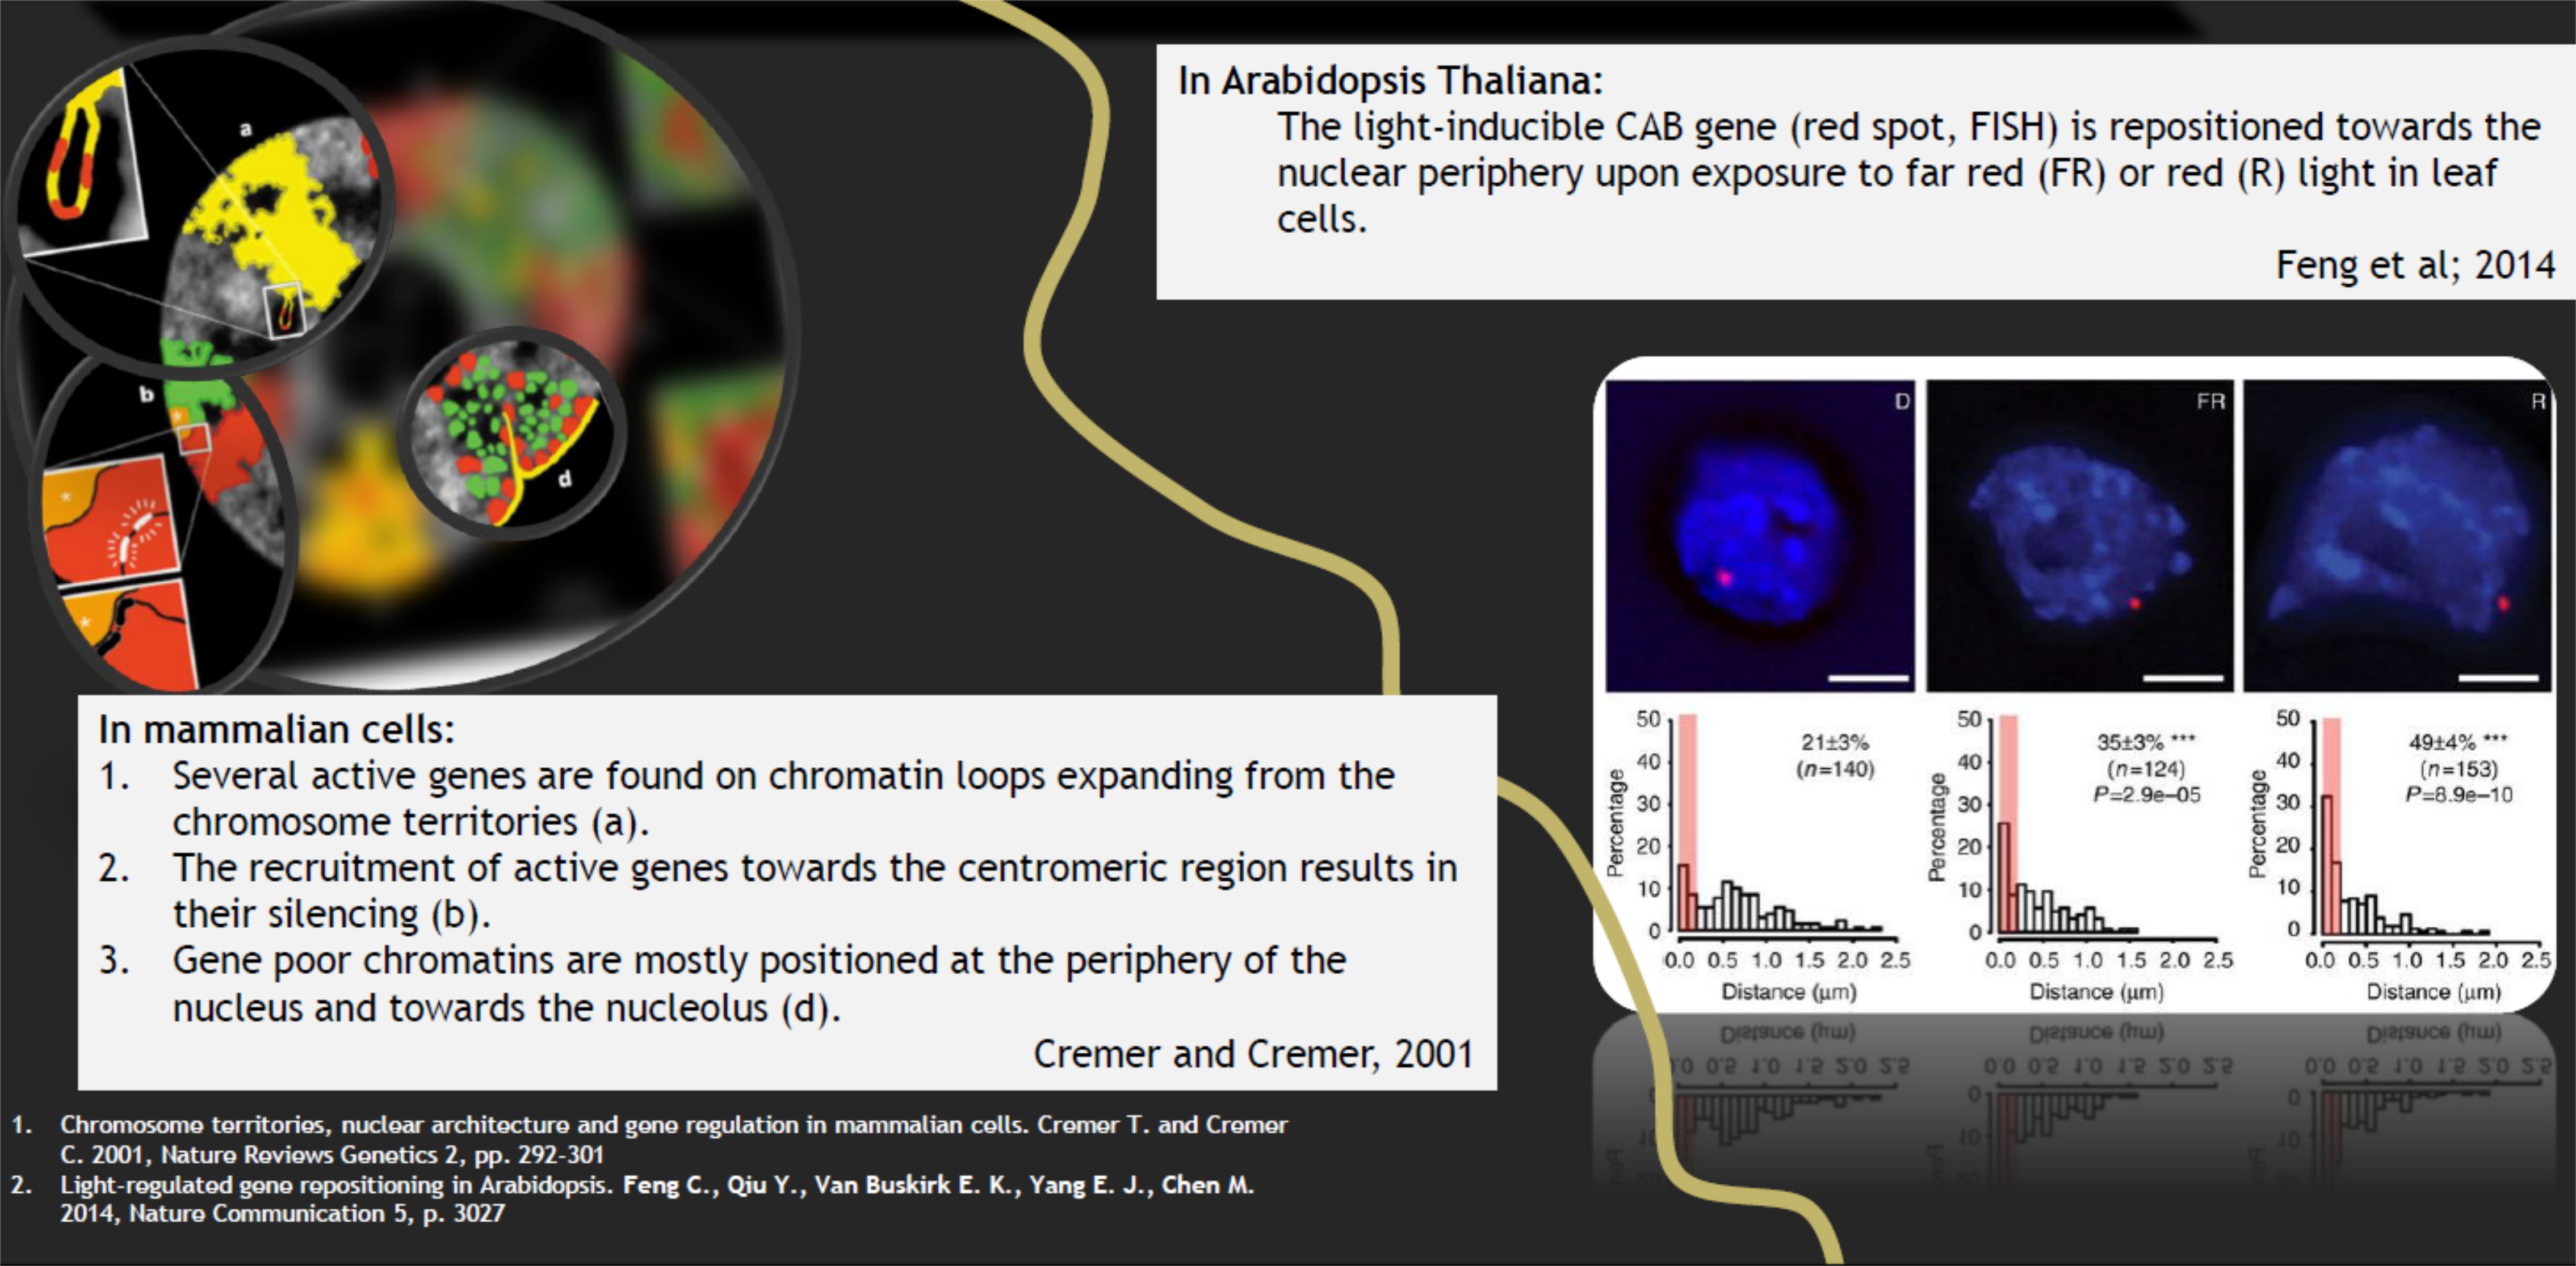

RNA PolII: Enzyme is implicated in gene expression. <br>
Our question : <b>Is there a distribution pattern of the foci, in regards to...

- DNA amount 
- Chromocenters, nucleolus and nucleus center of mass
- Other RNA PolII foci?</b>

** Method: **
* Process and clean data resulting from plugins and then processed in RNA PolII Data processing jupyter script
* Run machine learning to test if collected features are sufficient to predict foci type
* If we get a good accuracy for the machine learning classifier, identy important features
* Visualise selected features as a function of foci type

In [1]:
### python packages required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble, preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
### make plot appear inline
% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. Reading RNA PolII Data processing exports and merging data frames

- The RNA PolII Data processing jupyter notebook saved a seperate .csv files resulting for each subfolders given as argument in previous script as list_of_folders (because limited RAM issue).
- To read, and merge the heavy data and do machine learning, we use python

### Merge MLResult_Segmented

In [2]:
isLinux=#*True if OS is linux or MAC, False if OS is windows*
FileSeperator="/" if isLinux else "\\"
Folder_Path= #*Add path to the folder containing all subfolders*
list_of_subfolder=#*Add vector containing subfolders' names*
Result=pd.DataFrame()
#MotherFolder= "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt"#for linux
for p in list_of_subfolder:
    FilePath = FileSeperator.join(map(str, [Folder_Path, str(p), "MLResult_Segmented.csv"])) 
    features = pd.read_csv(FilePath)
    Result=Result.append(features)
del features

In [8]:
print(Result.shape)
print (Result.columns)

(542412, 51)
Index([u'SpotId', u'FociType', u'File', u'Nucleus_MeanDist',
       u'Nucleus_MinDist', u'Nucleus_MaxDist', u'Chromocenters_MeanDist',
       u'Chromocenters_MinDist', u'Chromocenters_MaxDist',
       u'Nucleolus_MeanDist', u'Nucleolus_MinDist', u'Nucleolus_MaxDist',
       u'Sp1MeanDist', u'Sp1MinDist', u'Sp1MaxDist', u'Sp2MeanDist',
       u'Sp2MinDist', u'Sp2MaxDist', u'Sp3MeanDist', u'Sp3MinDist',
       u'Sp3MaxDist', u'N1Volume', u'N1IntensityCh0', u'N1IntensityCh1',
       u'N1IntensityCh2', u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0',
       u'N2IntensityCh1', u'N2IntensityCh2', u'N2IntensityCh3',
       u'IntensityCh0', u'IntensityCh1', u'IntensityCh2', u'IntensityCh3',
       u'SegmentChannel', u'Nucleus_NumbSpot', u'Chromocenters_NumbSpot',
       u'Nucleolus_NumbSpot', u'Sp1NumbSpot', u'Sp2NumbSpot', u'Sp3NumbSpot',
       u'NucleusCMDist', u'NucleolusCMDist', u'MeanCCDist', u'ClosestCCCMDist',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'I

####  Save intermediate data frame

In [4]:
FilePath = FileSeperator.join(map(str, [Folder_Path, "MLResultObs.csv"])) 
Result.to_csv(FilePath, index=False)
del Result

### Merge MLResult_Simulated

In [5]:
ResultSim=pd.DataFrame()
for p in range(1,5):
    FilePath = FileSeperator.join(map(str, [Folder_Path, str(p), "MLResult_Simulated.csv"])) 
    features = pd.read_csv(FilePath)
    ResultSim=ResultSim.append(features)
del features

####  Save intermediate data frame

In [7]:
print(ResultSim.shape)

(1020000, 51)


In [217]:
FilePath = FileSeperator.join(map(str, [Folder_Path, "MLResultSim.csv"])) 
ResultSim.to_csv(FilePath, index=False)

### Merge observed and simulated data

In [ ]:
#Read saved MLResultObs.csv file
FilePath = FileSeperator.join(map(str, [Folder_Path, "MLResultObs.csv"])) 
ResultObs = pd.read_csv(FilePath)

In [9]:
Result = ResultObs.append(ResultSim)

In [10]:
print(Result.shape)

(1562412, 51)


In [11]:
del ResultObs,ResultSim

In [12]:
FilePath = FileSeperator.join(map(str, [Folder_Path, "MLResultR.csv"])) 
Result.to_csv(FilePath, index=False)

In [5]:
#del features
Result.columns

Index([u'SpotId', u'FociType', u'File', u'Nucleus_MeanDist',
       u'Nucleus_MinDist', u'Nucleus_MaxDist', u'Chromocenters_MeanDist',
       u'Chromocenters_MinDist', u'Chromocenters_MaxDist',
       u'Nucleolus_MeanDist', u'Nucleolus_MinDist', u'Nucleolus_MaxDist',
       u'Sp1MeanDist', u'Sp1MinDist', u'Sp1MaxDist', u'Sp2MeanDist',
       u'Sp2MinDist', u'Sp2MaxDist', u'Sp3MeanDist', u'Sp3MinDist',
       u'Sp3MaxDist', u'N1Volume', u'N1IntensityCh0', u'N1IntensityCh1',
       u'N1IntensityCh2', u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0',
       u'N2IntensityCh1', u'N2IntensityCh2', u'N2IntensityCh3',
       u'IntensityCh0', u'IntensityCh1', u'IntensityCh2', u'IntensityCh3',
       u'SegmentChannel', u'Nucleus_NumbSpot', u'Chromocenters_NumbSpot',
       u'Nucleolus_NumbSpot', u'Sp1NumbSpot', u'Sp2NumbSpot', u'Sp3NumbSpot',
       u'NucleusCMDist', u'NucleolusCMDist', u'MeanCCDist', u'ClosestCCCMDist',
       u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC', u'IntensityCh2CC

### Columns description
----
* <b>SpotId</b>: Spot index
* <b>FociType</b>: Segmented or Simulated 
* <b>File</b>: File name
* <b>SegmentChannel</b>: for segmented spots = intensity in channel the foci belongs to; for simulated spots = -1


----
#### Nucleus related features 
* <b>Nucleus_NumbSpot</b>: number of nucleus vertices within 1um radius of the spot
* <b>Nucleus_MeanDist</b>: average distance of spot to nucleus periphery vertices within 1um radius
* <b>Nucleus_MinDist</b>: minimum distance of spot to nucleus periphery vertices within 1um radius
* <b>Nucleus_MaxDist</b>: maximum distance of spot to nucleus periphery vertices within 1um radius
* <b>NucleusCMDist</b>: distance of spot to nucleus center of mass
* <b>N1Volume</b>: nucleus volume
* <b>N1IntensityCh0</b>: average intensity in channel 0 (DAPI) of the closest chromocenter
* <b>N1IntensityCh1</b>: average intensity in channel 1 of the closest chromocenter
* <b>N1IntensityCh2</b>: average intensity in channel 2 of the closest chromocenter
* <b>N1IntensityCh3</b>: average intensity in channel 3 of the closest chromocenter


----
#### Nucleolus related features 
* <b>Nucleolus_NumbSpot</b>: number of nucleolus vertices within 1um radius of the spot
* <b>Nucleolus_MeanDist</b>: average distance of spot to nucleolus periphery vertices within 1um radius
* <b>Nucleolus_MinDist</b>: minimum distance of spot to nucleolus periphery vertices within 1um radius
* <b>Nucleolus_MaxDist</b>: maximum distance of spot to nucleolus periphery vertices within 1um radius
* <b>NucleolusCMDist</b>: distance of spot to nucleolus center of mass
* <b>N2Volume</b>: nucleolus volume
* <b>N2IntensityCh0</b>: average intensity in channel 0 (DAPI) of the closest chromocenter
* <b>N2IntensityCh1</b>: average intensity in channel 1 of the closest chromocenter
* <b>N2IntensityCh2</b>: average intensity in channel 2 of the closest chromocenter
* <b>N2IntensityCh3</b>: average intensity in channel 3 of the closest chromocenter


----
#### Chromocenter related features 
* <b>Chromocenters_NumbSpot</b>: number of chromocenters vertices within 1um radius of the spot
* <b>Chromocenters_MeanDist</b>: average distance of spot to chromocenters periphery vertices within 1um radius
* <b>Chromocenters_MinDist</b>: minimum distance of spot to chromocenters periphery vertices within 1um radius
* <b>Chromocenters_MaxDist</b>: maximum distance of spot to chromocenters periphery vertices within 1um radius
* <b>MeanCCDist</b>: distance of spot to chromocenters center of mass
* <b>ClosestCCCMDist</b>: distance of spot to center of mass of the closest chromocenter
* <b>VolumeCC</b>: volume of the closest chromocenter
* <b>IntensityCh0CC</b>: average intensity in channel 0 (DAPI) of the closest chromocenter
* <b>IntensityCh1CC</b>: average intensity in channel 1 of the closest chromocenter
* <b>IntensityCh2CC</b>: average intensity in channel 2 of the closest chromocenter
* <b>IntensityCh3CC</b>: average intensity in channel 3 of the closest chromocenter


----
#### Channel1 = Non phosporylated RNA PolII
* <b>Sp1NumbSpot</b>: number of foci from channel1 200nm  radius of the spot
* <b>Sp1MeanDist</b>: average distance of spot to foci from channel1 within 200nm  radius of the spot
* <b>Sp1MinDist</b>: minimun distance of spot to foci from channel1 within 200nm  radius of the spot 
* <b>Sp1MaxDist</b>: maximum distance of spot to foci from channel1 within 200nm  radius of the spot


----
#### Channel2 = Ser2P RNA PolII
* <b>Sp2NumbSpot</b>: number of foci from channel2 200nm  radius of the spot
* <b>Sp2MeanDist</b>: average distance of spot to foci from channel2 within 200nm  radius of the spot
* <b>Sp2MinDist</b>: minimun distance of spot to foci from channel2 within 200nm  radius of the spot 
* <b>Sp2MaxDist</b>: maximum distance of spot to foci from channel2 within 200nm  radius of the spot


----
#### Channel3 = Ser5P RNA PolII
* <b>Sp3NumbSpot</b>: number of foci from channel3 200nm  radius of the spot
* <b>Sp3MeanDist</b>: average distance of spot to foci from channel3 within 200nm  radius of the spot
* <b>Sp3MinDist</b>: minimun distance of spot to foci from channel3 within 200nm  radius of the spot 
* <b>Sp3MaxDist</b>: maximum distance of spot to foci from channel3 within 200nm  radius of the spot

## 2. Clean data

* <b>Visualise</b> numeric features 
* <b>Scale</b> nucleus and nucleolus features (volume and intensities), (other features specific to spots have already been scaled for each image)
* <b>Manage missing data</b>
* <b>Merge nucleus ploidy data </b>

### Visualise features
0. Drop SpotId = don't need that column of analysis
1. For visualisation : drop Categorical columns <i>FociType</i> and  <i>File</i>

In [3]:
#remove SpotId column
Result=Result.drop("SpotId", axis=1)

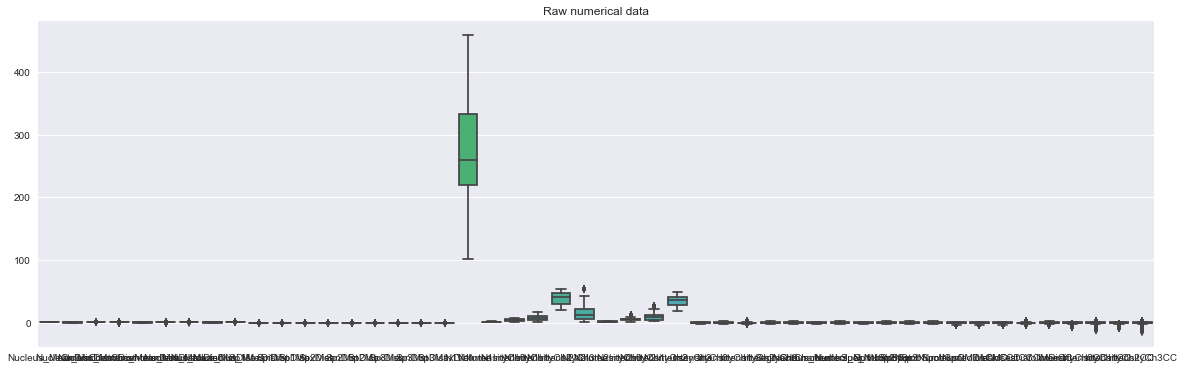

In [7]:
#Boxplot feature before removing outliers
test=Result.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("Raw numerical data")

### Scale features
- Nucleus, nucleolus features

In [15]:
ColumnsToScale = [u'N1IntensityCh0',
       u'N1IntensityCh1', u'N1IntensityCh2', u'N1IntensityCh3', u'N1Volume',
       u'N2IntensityCh0', u'N2IntensityCh1', u'N2IntensityCh2',
       u'N2IntensityCh3', u'N2Volume']
newdf = pd.DataFrame(preprocessing.scale(Result[ColumnsToScale]), index=Result.index, columns=ColumnsToScale)
newdf1 = Result.drop(ColumnsToScale, 1)
newdf = pd.concat([newdf1, newdf], axis=1)
del newdf1
newdf.head()

FociType                     File  Nucleus_MeanDist  Nucleus_MinDist  \
0         1  s20_wt_aa_series005.ims          0.635023         0.094970   
1         1  s20_wt_aa_series005.ims          0.920218         0.850991   
2         1  s20_wt_aa_series005.ims          0.683603         0.063165   
3         1  s20_wt_aa_series005.ims          0.701352         0.240157   
4         1  s20_wt_aa_series005.ims          0.679414         0.098828   

   Nucleus_MaxDist  Chromocenters_MeanDist  Chromocenters_MinDist  \
0         0.998304                0.773548               0.534395   
1         0.989156                0.660642               0.124662   
2         0.995404                     NaN                    NaN   
3         0.999652                0.959830               0.921186   
4         0.999652                     NaN                    NaN   

   Chromocenters_MaxDist  Nucleolus_MeanDist  Nucleolus_MinDist    ...     \
0               0.996980                 NaN                NaN    ...      
1               0.999427                 NaN                NaN    ...      
2                    NaN                 NaN                NaN    ...      
3               0.997536                 NaN                NaN    ...      
4                    NaN                 NaN                NaN    ...      

   N1IntensityCh0  N1IntensityCh1  N1IntensityCh2  N1IntensityCh3  N1Volume  \
0        0.891249        -0.60571        0.735665       -1.197396  0.183007   
1        0.891249        -0.60571        0.735665       -1.197396  0.183007   
2        0.891249        -0.60571        0.735665       -1.197396  0.183007   
3        0.891249        -0.60571        0.735665       -1.197396  0.183007   
4        0.891249        -0.60571        0.735665       -1.197396  0.183007   

   N2IntensityCh0  N2IntensityCh1  N2IntensityCh2  N2IntensityCh3  N2Volume  
0        0.254529       -0.425106         0.58916       -1.173284 -0.885794  
1        0.254529       -0.425106         0.58916       -1.173284 -0.885794  
2        0.254529       -0.425106         0.58916       -1.173284 -0.885794  
3        0.254529       -0.425106         0.58916       -1.173284 -0.885794  
4        0.254529       -0.425106         0.58916       -1.173284 -0.885794  

[5 rows x 50 columns]

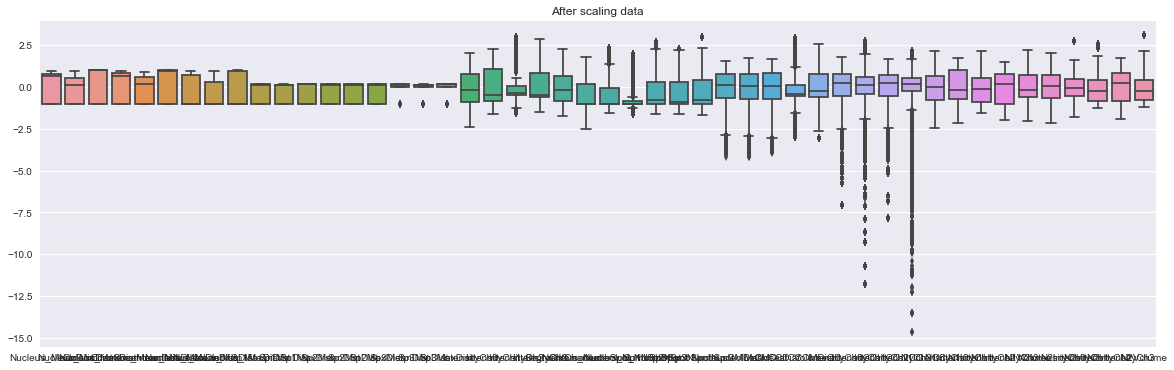

In [281]:
#Boxplot numeric feature after scaling nucleus and nucleolus features
test=newdf.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("After scaling data")

### Manage missing data

Missing data occurs during distance calculation, if there is not vertices within 1um radius (for spot to surface distance calculation) or if there are no foci within 200nm (for spot to spot distance calculation)

In [16]:
NumberOfSpots=["Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot", "Nucleolus_NumbSpot", "Nucleus_NumbSpot", "Chromocenters_NumbSpot"]
DistanceFeatures=["Sp1MeanDist", "Sp1MinDist", "Sp1MaxDist", 
          "Sp2MeanDist", "Sp2MinDist", "Sp2MaxDist", 
          "Sp3MeanDist", "Sp3MinDist", "Sp3MaxDist", 
          "Nucleolus_MeanDist", "Nucleolus_MinDist", "Nucleolus_MaxDist",
          "Nucleus_MeanDist", "Nucleus_MinDist", "Nucleus_MaxDist",
          "Chromocenters_MeanDist", "Chromocenters_MinDist", "Chromocenters_MaxDist"]
newdf[NumberOfSpots+DistanceFeatures]=newdf[NumberOfSpots+DistanceFeatures].fillna(-1)

### Merge nucleus ploidy data


These data is produced by the plugin <i>XTNucleiPloidy_Result.py</i> Imaris plugin saved in the <b>Image-Processing</b> repository.

In [ ]:
#Read ploidy file
FilePath = FileSeperator.join(map(str, [Folder_Path, XTNucleiPloidy_Result, "XTNucleiPloidy_Result.csv"])) 
Ploidy = pd.read_csv(FilePath)
Ploidy.head()

#Merge data
Ploidy=Ploidy[["ClusterId", "FileName"]]
newdf = newdf.join(Ploidy.set_index('FileName'), on='File')
newdf.head()

FactorColumns=["ClusterId", "File"]   
for c in FactorColumns:
    newdf[c] = pd.factorize(newdf[c])[0]

newdf.head()

del Ploidy

## 3. Machine learning
* Modify <i>Segmentchannel</i>. In RNA PolII Data processing, features are scaled after I created this column. However it could be that there is a signal strength difference between antibodies. 
* <b>Split train and test</b> set of segmented data while preserving foci type proportion
* Use <b>random forest classifier</b> to predict segmented foci type using other features
* <b>Fine tune number of trees</b> to improve accuracy and F1Score
* Set <b>scoring ="f1_weighted"</b>, because I have different number of foci for each spot / foci type, this can cause a higher accuracy for the prediction of the foci type with the higher number of spots, I need to compensate for unbalanced data.
* <b>Train classifiers</b> on portion of segmented spots and <b>test on test set of segmented data</b>
* <b>Test classifier on simulated data as well</b>
* Get <b> Rate features importance</b> to predict foci type

Method definition:<br>
<b>f1_weighted:</b> Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 

In [16]:
#Modify SegmentChannel
newdf["SegmentChannel"]=0 #for simulated data
newdf.loc[newdf["FociType"]==0,"SegmentChannel"] =newdf.loc[newdf["FociType"]==0,'IntensityCh1'] # NP intensity
newdf.loc[newdf["FociType"]==1,"SegmentChannel"] =newdf.loc[newdf["FociType"]==1,'IntensityCh2'] # Ser2P intensity
newdf.loc[newdf["FociType"]==2,"SegmentChannel"] =newdf.loc[newdf["FociType"]==2,'IntensityCh3'] # Ser5P intensity

### Split train and test set

In [17]:
#Get seperate data frames with simulated spot and segmented spot
SimulatedData = newdf.loc[newdf["FociType"]>2,]
SegmentedData = newdf.loc[newdf["FociType"]<3,]
print(SimulatedData.shape)
print(SegmentedData.shape)

(1020000, 51)
(542412, 51)


In [17]:
#Prepare train set and test set, 7:3 ratio
labels  = SegmentedData["FociType"].values
TrainSet,TestSet = train_test_split(SegmentedData,stratify=labels, test_size=0.3, random_state=20012017)
features= TrainSet.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values
labels  = TrainSet["FociType"].values
print(TrainSet.shape)
print(TestSet.shape)

(379688, 51)
(162724, 51)


### Find tune number of trees

In [120]:
#TEST F1 SCORE
F1Score=[]
for nbreTree in range(10,140,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetF1 = cross_validation.cross_val_score(rf, features, labels, cv=10, scoring="f1_weighted")
    F1Score.append(GetF1)
    print(nbreTree)

10
20
30
40
50
60
70
80
90
100
110
120
130


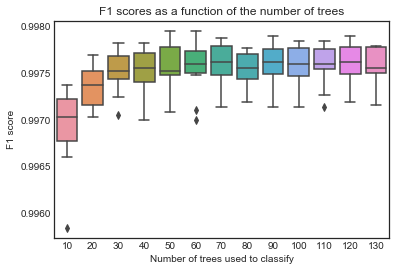

In [121]:
sns.boxplot(range(10,140,10), F1Score)
plt.xlabel("Number of trees used to classify")
plt.ylabel("F1 score")
plt.title("F1 scores as a function of the number of trees")
plt.show()

** >F1 score, doesn't seem to improve after 30 trees ...40 to be safe **

In [65]:
#TEST ACCURACY
Accuracy=[]
for nbreTree in range(40,100,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetScore = cross_validation.cross_val_score(rf, features, labels, cv=10)
    Accuracy.append(GetScore)
    print(nbreTree)

40
50
60
70
80
90


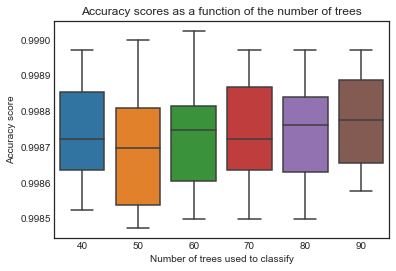

In [66]:
sns.boxplot(range(40,100,10), Accuracy)
plt.xlabel("Number of trees used to classify")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores as a function of the number of trees")
plt.show()

** >Accuracy, doesn't seem to improve after 40 either **

* Set parameters for classifier: ***Number of tree = 40***

### Train classifier

In [56]:
rf= ensemble.RandomForestClassifier(n_estimators=40)
rf.fit(features,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Test on test set of segmented data

In [57]:
PredFoci=rf.predict(TestSet[Lab])

In [58]:
FociNames=["NP", "Ser2P", "Ser5P"]
predFociRealLab = [FociNames[y] for y in PredFoci]
ObserRealLab=[FociNames[y] for y in TestSet["FociType"].values]
print(predFociRealLab [0:6])
print(ObserRealLab [0:6])

['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']


In [59]:
pd.crosstab(np.array(ObserRealLab), np.array(predFociRealLab), 
            rownames=['Actual Foci'], colnames=['Predicted Foci'], 
            normalize='index')

Predicted Foci        NP     Ser2P     Ser5P
Actual Foci                                 
NP              0.998012  0.000197  0.001792
Ser2P           0.012553  0.981982  0.005465
Ser5P           0.000729  0.002682  0.996588

In [60]:
print("Accuracy score:")
print(metrics.accuracy_score(TestSet["FociType"].values, PredFoci))

Accuracy score:
0.993879206509


### Add simulated data in test data 
***How are the simulated spots classified?***

In [61]:
TestWSim=TestSet.append(SimulatedData)
PredSim=rf.predict(TestWSim[Lab])

In [62]:
FociNames=["NP", "Ser2P", "Ser5P", "Sim"]
predSimLab = [FociNames[y] for y in PredSim]
RealLabel = TestSet["FociType"].values.tolist()+np.repeat(3, len(SimulatedData)).tolist()
ObserSimLab=[FociNames[y] for y in np.array(RealLabel)]
print(predSimLab [0:6])
print(ObserSimLab [0:6])
print("Accuracy score:")
print(metrics.accuracy_score(TestWSim["FociType"].values, PredSim))

['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
Accuracy score:
0.136741961776


In [63]:
pd.crosstab(np.array(ObserSimLab), np.array(predSimLab), 
            rownames=['Actual Foci'], colnames=['Predicted Foci'], 
            normalize='index')

Predicted Foci        NP     Ser2P     Ser5P
Actual Foci                                 
NP              0.998012  0.000197  0.001792
Ser2P           0.012553  0.981982  0.005465
Ser5P           0.000729  0.002682  0.996588
Sim             0.030401  0.443295  0.526304

### Rate important features

In [64]:
impFeatures=rf.feature_importances_

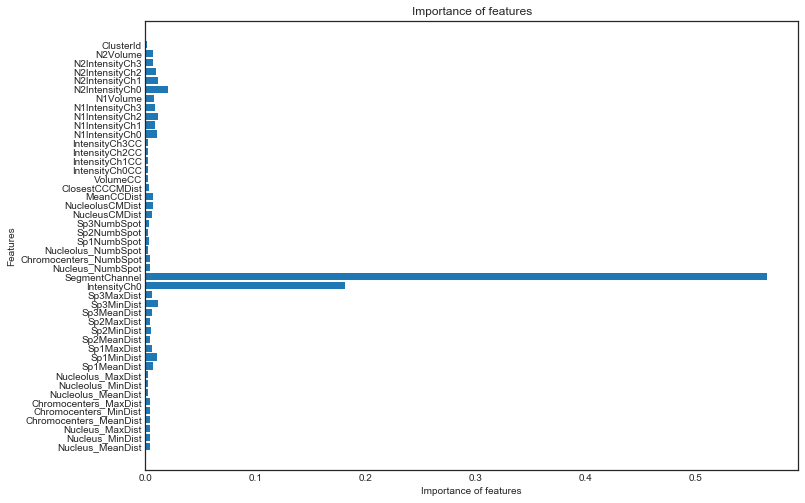

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features")
plt.show()

**>Important features are: **
* Segmented channel intensity (1)
* DAPI intensitiy (2)
* Distance to Ser5P and NP spots (3)
* Intensities of all PolII inside the nucleus (4)
* DAPI and PolII intensities inside the nucleolus surface (5)
* Nucleus and nucleolus volume (6)
* Position in regards to all chromocenters and the nucleolus CM (7)

## 4. Visualise selected features as a function of foci type

### Intensities in different channels as a function of foci type

In [24]:
Labi=["Sim1", "Sim2", "Sim3","None", "RNA PolII NP", "RNA PolII Ser2P", "RNA PolII Ser5P"]
ActFoci=newdf["FociType"]
newdf["FociType"]=[Labi[x+3] for x in ActFoci]

Foci=newdf["FociType"]
Ser5Ch=newdf["IntensityCh3"]
Ser2Ch=newdf["IntensityCh2"]

newdf["FociType1"]=["Active PolII" if (x=="RNA PolII Ser2P" and y>0) or (x=="RNA PolII Ser5P" and z>0) else x for x,y,z in zip(Foci, Ser5Ch, Ser2Ch)]
#newdf["FociType"]=["Non phosphorylated PolII" if (x=="RNA PolII NP" and y==z==0) else x for x,y,z in zip(Foci, Ser5Ch, Ser2Ch)]


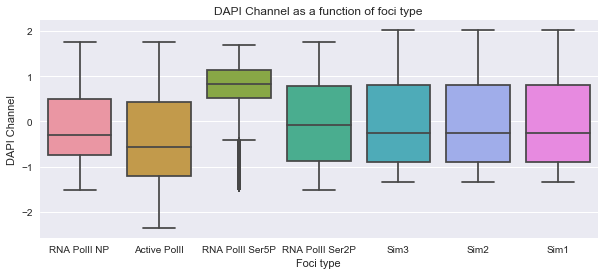

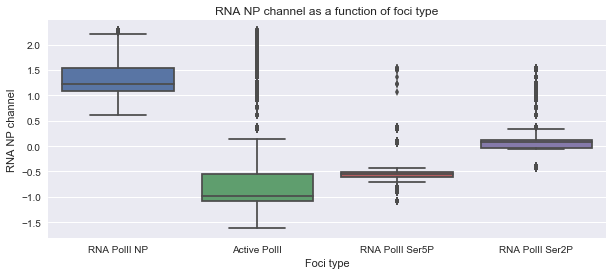

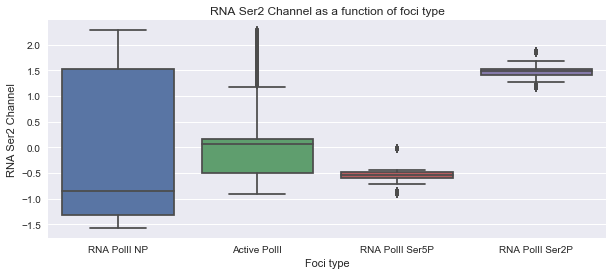

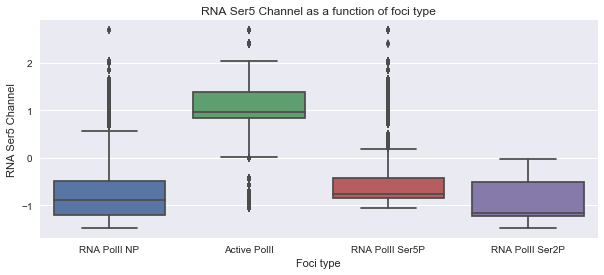

In [25]:
Ylab=["RNA NP channel", "RNA Ser2 Channel", "RNA Ser5 Channel"]
lab="DAPI Channel"
feat=0
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
sns.boxplot(newdf["FociType1"], newdf["IntensityCh"+str(feat)])
plt.xlabel("Foci type")
#ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
plt.ylabel(lab)
plt.title(lab+" as a function of foci type")
plt.show()
fig.savefig(lab+"1.png")
features=newdf[newdf["FociType1"].isin(["RNA PolII NP", "RNA PolII Ser2P", "RNA PolII Ser5P", "Active PolII"])]
for feat, lab in zip(range(1,4), Ylab):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,4)
    sns.boxplot(features["FociType1"], features["IntensityCh"+str(feat)])
    plt.xlabel("Foci type")
    #ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
    plt.ylabel(lab)
    plt.title(lab+" as a function of foci type")
    plt.show()
    fig.savefig(lab+"1.png")

### Number of spots as a function of distance to surfaces

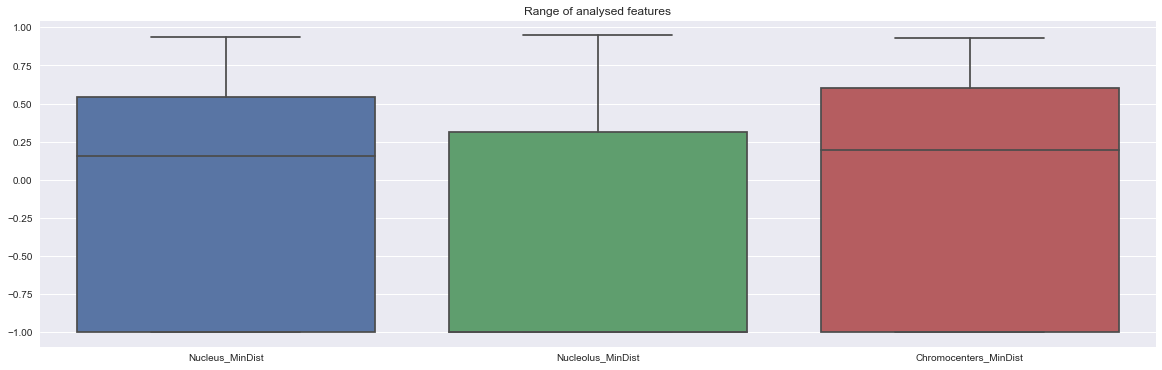

In [622]:
AnalysedFeat=["Nucleus_MinDist", "Nucleolus_MinDist", "Chromocenters_MinDist"]
tab=newdf[AnalysedFeat]
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=tab)
plt.title("Range of analysed features")

In [623]:
#Tag distance within threshold and outside of threshold = 0.2 um
tab=pd.DataFrame(newdf.loc[newdf["ClusterId"]==0, SelFeat+AnalysedFeat+["FociType", "File", "IntensityCh3"]])
tab.loc[tab.Sp1MinDist>-1, 'Sp1MinDist'] = "WithinThreshold"
tab.loc[tab.Sp1MinDist==-1, 'Sp1MinDist'] = "OutsideThreshold"
tab.loc[tab.Sp2MinDist>-1, 'Sp2MinDist'] = "WithinThreshold"
tab.loc[tab.Sp2MinDist==-1, 'Sp2MinDist'] = "OutsideThreshold"
tab.loc[tab.Sp3MinDist>-1, 'Sp3MinDist'] = "WithinThreshold"
tab.loc[tab.Sp3MinDist==-1, 'Sp3MinDist'] = "OutsideThreshold"
print(tab.shape)

(827874, 9)


In [625]:
#breakContinuousD=[x/5.0 for x in range(-10,11)]+[10.0]
breakContinuousD=[x/10.0 for x in range(0,11)]
factIntiate=0
for col in AnalysedFeat:
    tab.sort_values(by=[col],inplace=True)
    tab[col]= pd.cut( tab[col], breakContinuousD) 
    print(col)

Nucleus_MinDist
Nucleolus_MinDist
Chromocenters_MinDist


In [687]:
#get unique rows of tab
labels=["FociType", "File", "Nucleus_MinDist"]
#tab=tab[tab["FociType"].isin(["RNA PolII NP", "RNA PolII Ser2P", "RNA PolII Ser5P", "Active PolII"])]
df=tab[labels]
df=df.drop_duplicates(subset=labels)
#df=pd.DataFrame(np.unique(df[labels], axis=0))
df.tail()

FociType  File Nucleus_MinDist
370369  RNA PolII Ser2P    15      (0.3, 0.4]
486433     Active PolII    26      (0.3, 0.4]
424198     RNA PolII NP    20      (0.3, 0.4]
482016     Active PolII    25      (0.4, 0.5]
403158     RNA PolII NP    17      (0.8, 0.9]

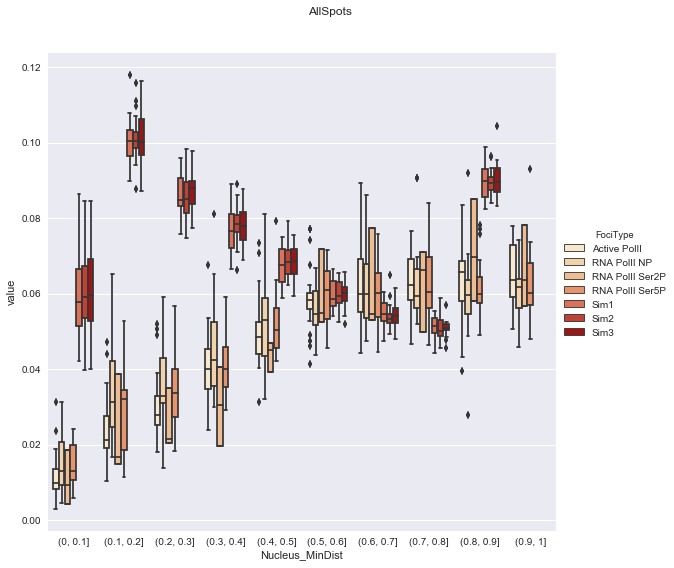

In [688]:
#set_palette(sns.cubehelix_palette(8))
df.columns=labels
df.head()
df.set_index(labels, inplace=True)
SelDist=["Sp1MinDist","Sp2MinDist", "Sp3MinDist"]
df1=df.copy()
#for distanceType in ["WithinThreshold", "OutsideThreshold"]:
for distanceType in ["AllSpots"]:
    df=df1.copy()
    for feat in SelDist:
        #t=tab.loc[tab[feat]==distanceType,]
        t=tab.copy()
        tsize=pd.DataFrame(t.groupby(labels).size())
        df = df.merge(tsize, how='outer', left_index=True, right_index=True)    
    df.columns=SelDist
    df.reset_index(inplace=True)
    tsize=pd.DataFrame(tab.groupby(["File", "FociType"]).size()) #Here I want to normalise by foci type
    tsize.columns=["AllSpots"]
    tsize.reset_index(inplace=True)
    df = df.merge(tsize, how='outer', on=["File", "FociType"])
    #Normalise number of spots
    df[SelDist]=df[SelDist].div(df.AllSpots, axis=0)
    #melt SelDist columns to get plots on one go
    z = pd.melt(df[labels+SelDist], id_vars=labels)
    #plot
    palette = sns.cubehelix_palette(8)
    g =sns.factorplot("Nucleus_MinDist", "value", hue="FociType", data=z, kind="box", palette="OrRd", size=8, aspect=1);
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(distanceType, fontsize=12)
    g.savefig("NucleusPeripherynbrSpotsby"+distanceType+"Norm.png")

## Conclusion
* Since were able to predict RNA PolII labeling accurately with our classifier, and with much better accuracy than the randomly simulated spots, RNA PolII distribution is not random.
* Active RNA PolII (containing both Ser2 and Ser5 phosphorylation) is present in areas with low DAPI intensity. This finding correlates with Cremer, 2001 publication, that reports that active genes cluster on chromatin looping out of the chromosome territoriesin mammalian cells. Could this also confirm the hypothesis, that genes are repositioned toward the transcription foci and it takes both Ser2 and Ser5 phosphorylation to allow this process?
* Inactive RNA PolII (containing only Ser2 phosphorylation) seems present in areas with high DAPI  intensity. These correlates with the previous result.
* The last plot of spot density as a function of distance to closest vertices of nucleus surface shows that there seems to be significantly fewer RNA PolII foci than random spots at the nucleus periphery. So could there be a system at the nucleus periphery that inhibits RNA PolII positioning at that area? This result also correlates with Cremer's result that gene poor chromatins are situated towards nuclear periphery. If this is also true in plant cells, it would make sense that if componenents on the nuclear pheriphery affect the positioning of RNA PolII complexe, and if the active genes are repositioned towards transcription machinery, gene rich chromatins are also situated away from the nuclear periphery?
